## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

## Loading datasets

In [2]:
movies = pd.read_csv(r"C:\Users\india\Downloads\movie_data\movies.csv")

In [3]:
rating = pd.read_csv(r"C:\Users\india\Downloads\movie_data\ratings.csv")

In [4]:
tags = pd.read_csv(r"C:\Users\india\Downloads\movie_data\tags.csv")

In [5]:
links = pd.read_csv(r"C:\Users\india\Downloads\movie_data\links.csv")

What is the shape of "movies.csv"?

In [6]:
movies.shape

(9742, 3)

What is the shape of "ratings.csv"?

In [7]:
rating.shape

(100836, 4)

How many unique "userId" are available in "ratings.csv"?


In [8]:
rating['userId'].nunique()

610

In [9]:
rating.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Which movie has recieved maximum number of user ratings?

In [12]:
merging = movies.merge(rating, how='inner', on='movieId')
countratings = pd.DataFrame(merging.groupby('title')['rating'].count()).sort_values('rating')
countratings.tail()

,rating
title,
"Matrix, The (1999)",278
"Silence of the Lambs, The (1991)",279
Pulp Fiction (1994),307
"Shawshank Redemption, The (1994)",317
Forrest Gump (1994),329


Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [13]:
tagmerged = movies.merge(tags, how='outer', on='movieId')
tagmerged[tagmerged['title']=='Matrix, The (1999)']

,movieId,title,genres,userId,tag,timestamp
2674,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424.0,martial arts,1.457843e+09
2675,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424.0,sci-fi,1.457843e+09
2676,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474.0,alternate universe,1.137205e+09
2677,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537.0,philosophy,1.424141e+09
2678,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537.0,post apocalyptic,1.424141e+09


What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [20]:
merged = movies.merge(rating,how = 'inner', on='movieId')
merged[merged['title'] == "Terminator 2: Judgment Day (1991)"].rating.mean()

3.970982142857143

How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: ylabel='Density'>

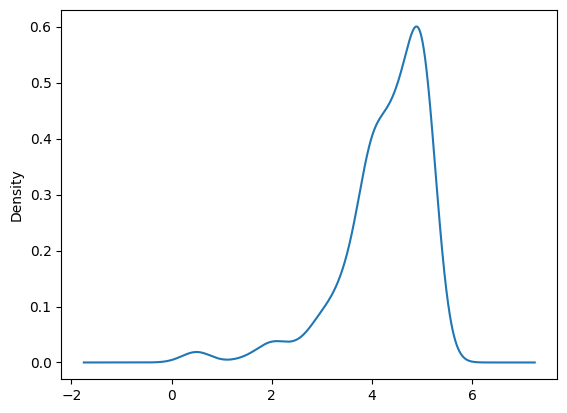

In [21]:
merged[merged['title'] ==  "Fight Club (1999)"].rating.plot(kind = 'kde')

Which movie is the most popular based on  average user ratings?


In [69]:
grouped_ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merge = movies.merge(grouped_ratings, on='movieId')
filtered = fil.merge(rating, on='movieId')
average_ratings = filtered.groupby('title')['rating'].mean().reset_index()
average_ratings.sort_values(by='rating')

,title,rating
426,Wild Wild West (1999),2.207547
104,Coneheads (1993),2.420635
94,City Slickers II: The Legend of Curly's Gold (...,2.645455
222,Judge Dredd (1995),2.669355
221,Johnny Mnemonic (1995),2.679245
...,...,...
131,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041
107,Cool Hand Luke (1967),4.271930
151,Fight Club (1999),4.272936
170,"Godfather, The (1972)",4.289062


In [31]:
merged = pd.merge(rating, movies, on='movieId', how='inner')
merged.

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [39]:
merged = pd.merge(rating, movies, on='movieId', how='inner')
ratings_count = merged.groupby('title')['rating'].count()
top_5 = ratings_count.sort_values(ascending=False).head(5).index
pd.DataFrame(top_5)

,title
0,Forrest Gump (1994)
1,"Shawshank Redemption, The (1994)"
2,Pulp Fiction (1994)
3,"Silence of the Lambs, The (1991)"
4,"Matrix, The (1999)"


Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [58]:
grouped_rating = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged = pd.merge(movies, grouped_rating, on='movieId', how='inner')
filtered = merged_df[merged_df['count'] > 50][filtered_df['genres'].str.contains('Sci-Fi')]
filtered.sort_values(by='count', ascending=False).iloc[2]

movieId                                 480
title                  Jurassic Park (1993)
genres     Action|Adventure|Sci-Fi|Thriller
count                                   238
mean                                   3.75
Name: 418, dtype: object

In [51]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt%7Bnew_id%7D/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : "sc-bde20123-1 cMEQkK"})
    return imdb_rating.text if imdb_rating else np.nan

In [57]:
filtered.merge(links, how='inner', on='movieId').sort_values('mean')

,movieId,title,genres,count,mean,imdbId,tmdbId
47,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547,120891,8487.0
9,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0
3,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0
2,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0
14,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547,117705,2300.0
...,...,...,...,...,...,...,...
68,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131,4.160305,338013,38.0
21,1199,Brazil (1985),Fantasy|Sci-Fi,59,4.177966,88846,68.0
43,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0
20,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,80684,1891.0
